In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Problem 1

In [ ]:
dataframe= pd.read_csv("/content/drive/MyDrive/Human_Development_Index_Dataset.csv",encoding="ISO-8859-1")

#dataframe.head()
#dataframe.tail()
#dataframe.describe()

unique_year= dataframe["year"].unique()
#print(f"the unique years are {unique_year}")

hdi_2022_df= dataframe[dataframe['year']==2022]
#hdi_2022_df.head(10)


row= dataframe.shape[0]
coln= dataframe.shape[1]
#print(f"there are {row} row and {coln} coln in dataframe")


#print("\n Column names and types are:")
#print(hdi_2022_df.dtypes)
#print("total null values in each columns are:  ")
#print(hdi_2022_df.isnull().sum())



HDI_2022clean= hdi_2022_df.dropna(subset=['hdi'])
# print("dropped sucessfully")
print(f"After dropping rows with missing HDI {HDI_2022clean.shape}")

HDI_2022_clean_datas = HDI_2022clean.drop_duplicates()
print(f"after removing duplicates {HDI_2022_clean_datas.shape}")
#left








#Basic Statistics:
mean_2022_mean= HDI_2022_clean_datas['hdi'].mean()
mean_2022_median= HDI_2022_clean_datas['hdi'].median()
mean_2022_sd= HDI_2022_clean_datas['hdi'].std()
#print(f"the mean is {mean_2022_mean}")
#print(f"the median is {mean_2022_median}")
#print(f"the standard deviation is {mean_2022_sd}")

maxhdi= HDI_2022_clean_datas.loc[HDI_2022_clean_datas['hdi'].idxmax(), ["country"]]
# id max returns the largest value of the column
#print(f"country with the highest HDi is {maxhdi} ")

minhdi= HDI_2022_clean_datas.loc[HDI_2022_clean_datas['hdi'].idxmin(), ["country"]]
#print(f"country with the lowest HDi is {minhdi} ")


#5. Filtering and Sorting:
hdi_8data= HDI_2022_clean_datas[HDI_2022_clean_datas['hdi']>0.800]
#print(f"the country with hdi greater than 0.8 are \n : {hdi_8data.head(5)}")

sorted_value= hdi_8data.sort_values(by="gross_inc_percap", ascending=False)
#print(f"the sorted top 10 value are \n {sorted_value.head(10)}")


#6. Adding HDI Category Column:

def classify_hdi(hdi):
  if hdi<0.550 and hdi > 0:
    return "low"
  elif hdi <0.700 and  hdi>=0.550:
    return "Medium"
  elif hdi >=0.700 and  hdi>0.799:
    return "High"
  elif hdi>= 0.799:
    return "very High"


HDI_2022_clean_datas['Category']= HDI_2022_clean_datas['hdi'].apply(classify_hdi)
#.apply()  applies our classification to every row
total_values= HDI_2022_clean_datas['Category'].value_counts()
#.value_counts() shows how many countries per category
print(f"the values are \n{total_values}")
HDI_2022_clean_datas.to_csv('HDI category added.csv',index=False)

After dropping rows with missing HDI (204, 30)
after removing duplicates (204, 30)
the values are 
Category
High         71
Medium       44
low          35
very High     1
Name: count, dtype: int64


3.2 Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)

there are total hdi        8
country    0
year       0
dtype: int64 missing values 


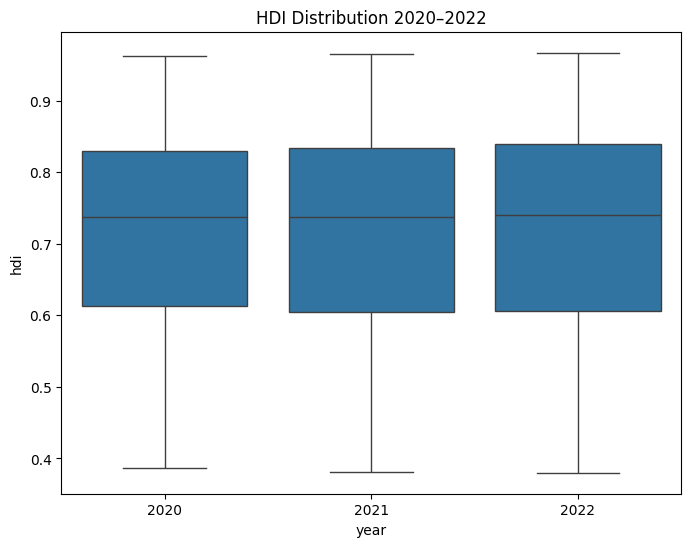

In [90]:
df= dataframe[dataframe["year"].isin([2020,2021,2022])].copy()
#df.head(6)

df.to_csv("HDI problem1B.csv",index=False)

#2. Data Cleaning:
missing_values= df[['hdi','country','year']].isnull().sum()
print(f"there are total {missing_values} missing values ")

# dropping duplicates values
df= df.dropna(subset=['hdi','country','year'])

# removing duplicates
df= df.drop_duplicates()
#left






#3. Visualization Tasks:
# A. Line Chart — HDI Trend (Country-Level):
# countries = ['India', 'Nepal', 'China', 'Brazil', 'United States']
# data= df[df['country'].isin(countries)]
# plt.figure(figsize=(10,6))
# sns.lineplot(data=data, x='year', y='hdi', hue='country', marker='o')
# plt.title("HDI Trend 2020–2022")
# plt.legend()
# plt.xlabel("Year")
# plt.ylabel("HDI")
# plt.show()


#B. Generate Visualizations:
# grouping= df.groupby(['region','year'])['hdi'].mean()
# print(grouping)
#left


#– Box Plot: HDI Distribution for 2020, 2021, and 2022
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='year', y='hdi')
plt.title("HDI Distribution 2020–2022")
plt.show()

